# Load the data（Core data）

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #Seaborn works well with pandas objects and not numpy. I think I like R better
import pandas as pd
from sklearn import preprocessing
f = open('CleanedUpCoreData.dat', 'r')
data = np.genfromtxt(f, skip_header=1) 
f.close()
extractedData1 = data[:, [1, 2, 3, 4]]
#rescale the data 
min_max_scaler= preprocessing.MinMaxScaler()
extractedData = min_max_scaler.fit_transform(extractedData1)
dataframe = pd.DataFrame(data = extractedData[:,:], columns = ['Porosity','TOC', 'Quartz','Calcite'])
sns.pairplot(dataframe)

# K-Means

Text(0, 0.5, 'SSW')

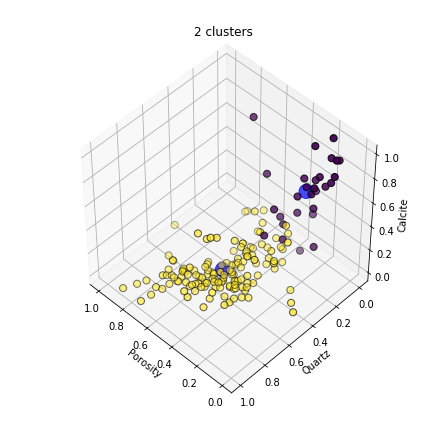

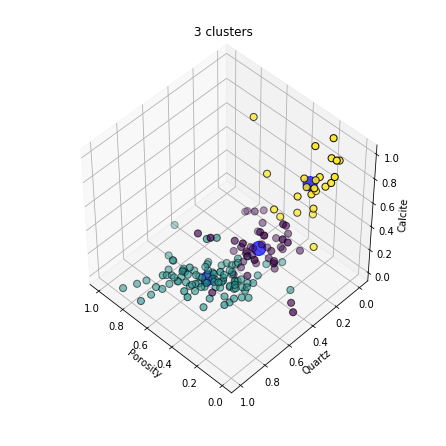

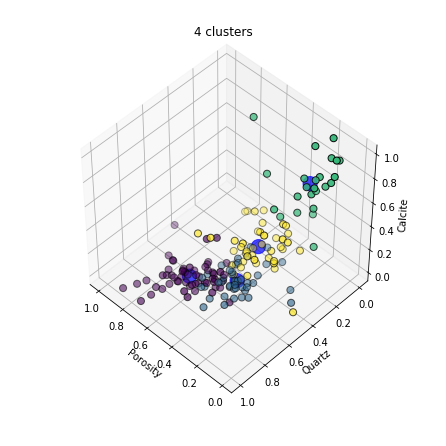

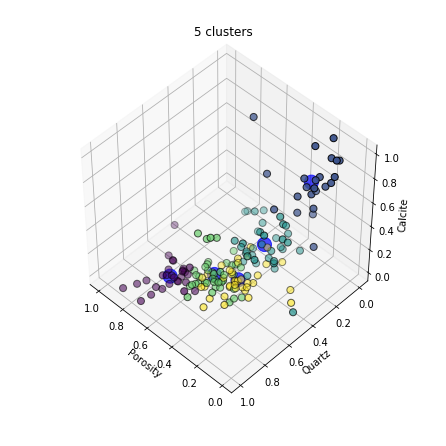

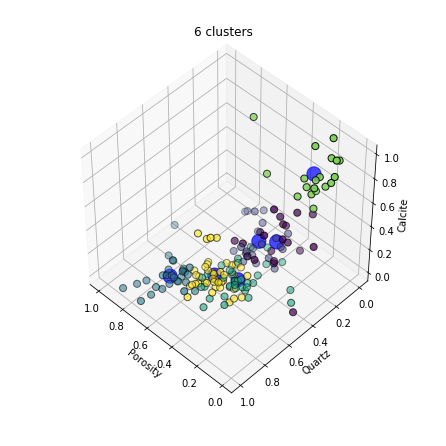

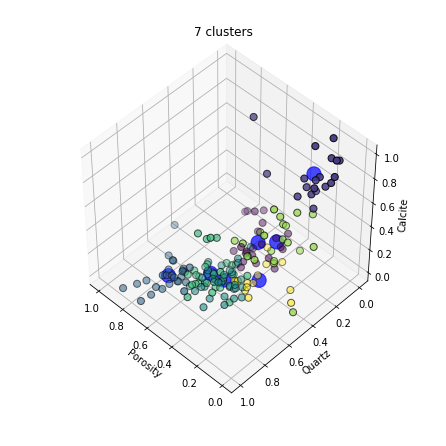

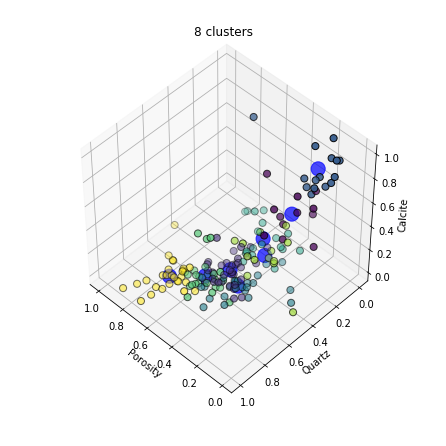

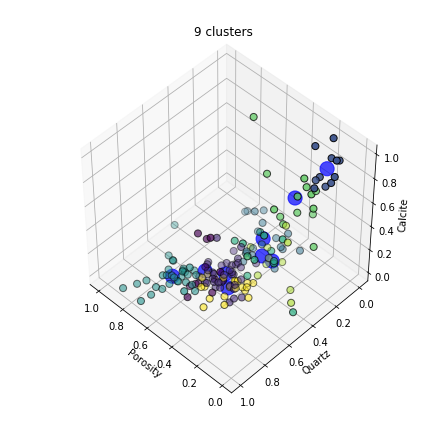

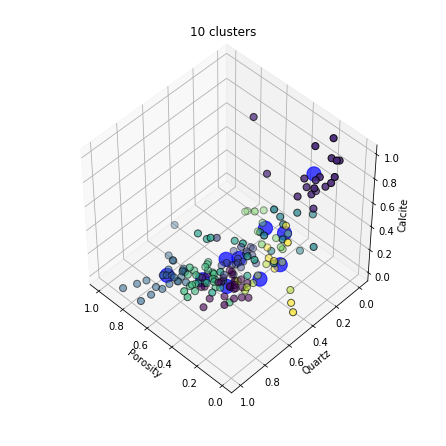

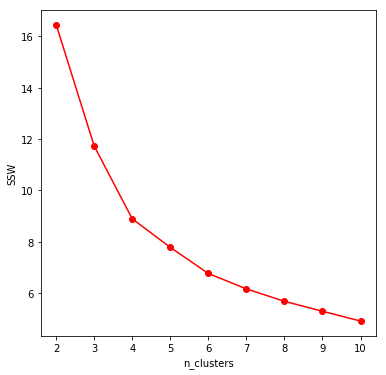

In [3]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
SSW = []
fignum = 1
n_clusters=[2,3,4,5,6,7,8,9,10]
for i in n_clusters:
   kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300)
   kmeans.fit(extractedData)
   classlabel = kmeans.predict(extractedData)
   centers = kmeans.cluster_centers_
# Store the SSW 
   SSW.append(kmeans.inertia_)
# 3D plot
   fig = plt.figure(fignum, figsize=(6, 6))
   ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134) #3D plot 
   ax.scatter(extractedData[:, 0], extractedData[:, 2], extractedData[:, 3], c=classlabel, s = 50, edgecolor='k')
   ax.scatter(centers[:, 0], centers[:, 2],centers[:, 3], c='blue', s=200, alpha=0.7)
#    ax.w_xaxis.set_ticklabels([])
#    ax.w_yaxis.set_ticklabels([])
#    ax.w_zaxis.set_ticklabels([])
   ax.set_xlabel('Porosity')
   ax.set_ylabel('Quartz')
   ax.set_zlabel('Calcite')
   ax.set_title('%i clusters'%i)
   ax.dist = 12
   fignum = fignum+1
# plot the relationship between SSW and n_cluster
m=len(n_clusters)
fig = plt.figure(m+1, figsize=(6, 6))
ax1=fig.add_subplot(111)
ax1.plot(n_clusters,SSW,'ro-')
ax1.set_xlabel('n_clusters')
ax1.set_ylabel('SSW')

# The Best cluster numbers is 3, which means the facies are 3

# The Hierarchical Clustering Algorithm

Text(0.5, 1.0, 'Average_Linkage')

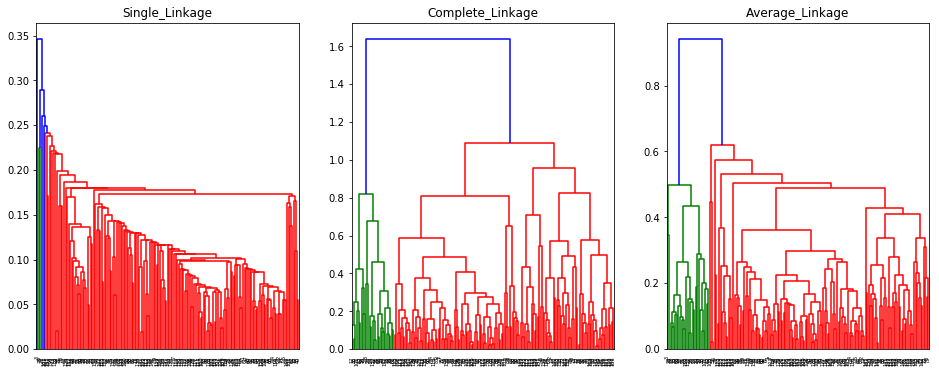

In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
fig = plt.figure(figsize=(16,6))
plt.subplot(131)
dendrogram1 = sch.dendrogram(sch.linkage(extractedData, method='single'))
plt.title('Single_Linkage')
plt.subplot(132)
dendrogram2 = sch.dendrogram(sch.linkage(extractedData, method='complete'))
plt.title('Complete_Linkage')
plt.subplot(133)
dendrogram3 = sch.dendrogram(sch.linkage(extractedData, method='average'))
plt.title('Average_Linkage')

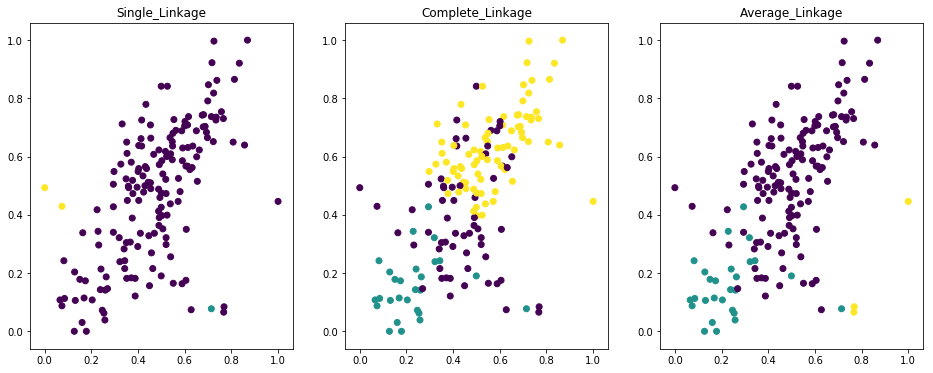

In [11]:
fig = plt.figure(figsize=(16,6))
axe=fig.add_subplot(131)
axe.set(title='Single_Linkage')
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
# save clusters for chart
y_hc = hc.fit_predict(extractedData)
axe.scatter(extractedData[:,0],extractedData[:,2], c=hc.labels_, cmap='viridis')
axe=fig.add_subplot(132)
axe.set(title='Complete_Linkage')
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
# save clusters for chart
y_hc = hc.fit_predict(extractedData)
axe.scatter(extractedData[:,0],extractedData[:,2], c=hc.labels_, cmap='viridis')
axe=fig.add_subplot(133)
axe.set(title='Average_Linkage')
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
# save clusters for chart
y_hc = hc.fit_predict(extractedData)
axe.scatter(extractedData[:,0],extractedData[:,2], c=hc.labels_, cmap='viridis')

# Load well Log Data

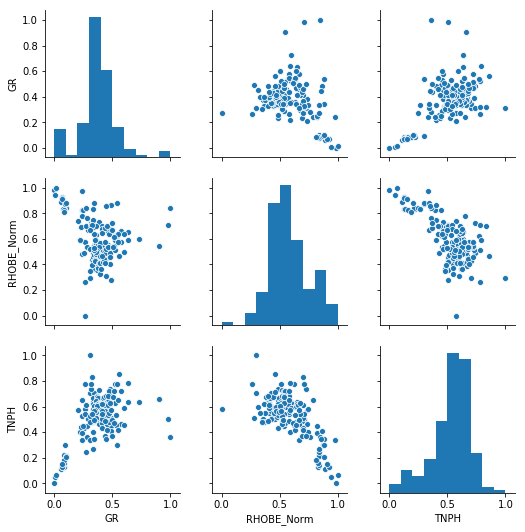

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #Seaborn works well with pandas objects and not numpy. I think I like R better
import pandas as pd
from sklearn import preprocessing
f = open('LogDatatoTrainSVM.dat', 'r')
data = np.genfromtxt(f, skip_header=1) 
f.close()
extractedData1 = data[:, [1, 2, 3]]
#rescale the data 
min_max_scaler= preprocessing.MinMaxScaler()
extractedData = min_max_scaler.fit_transform(extractedData1)
dataframe = pd.DataFrame(data = extractedData[:,:], columns = ['GR','RHOBE_Norm', 'TNPH'])
sns.pairplot(dataframe)

# Unsupervised Method-- K Means 

Text(0, 0.5, 'SSW')

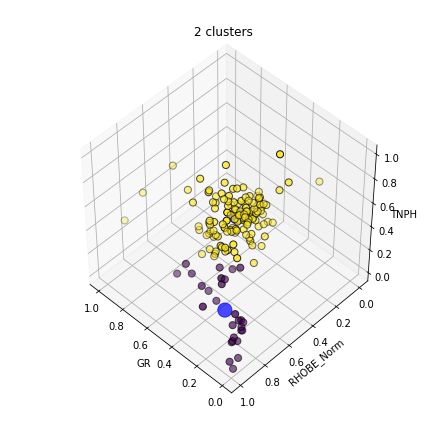

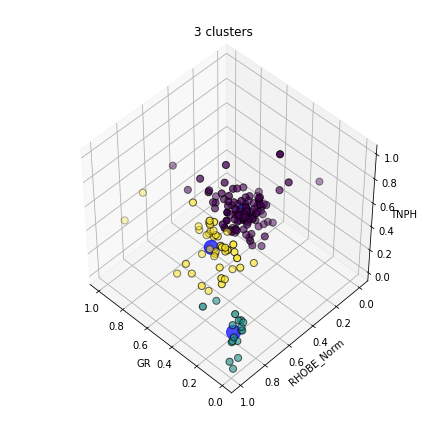

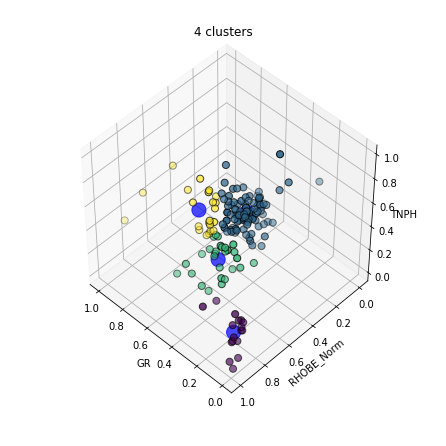

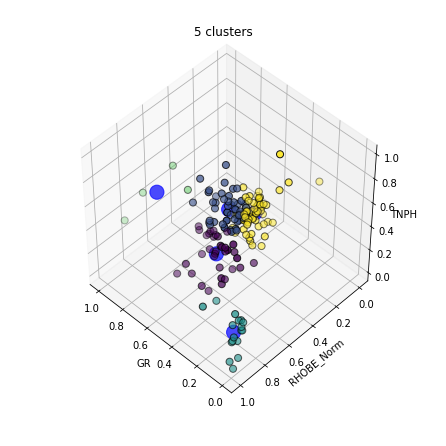

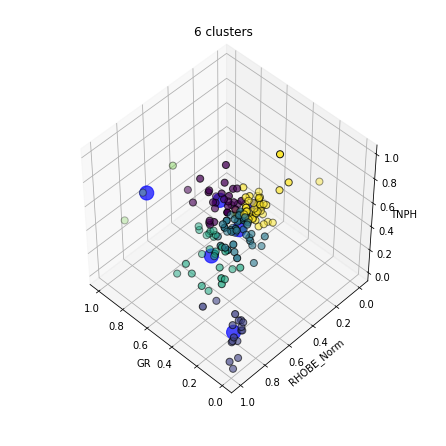

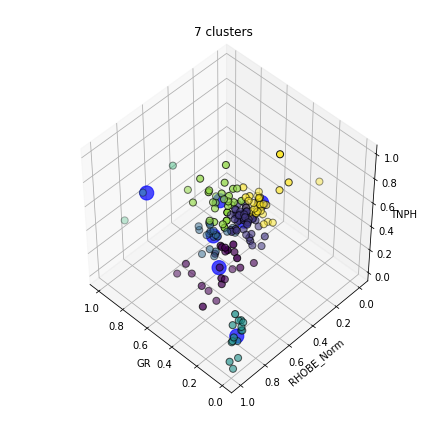

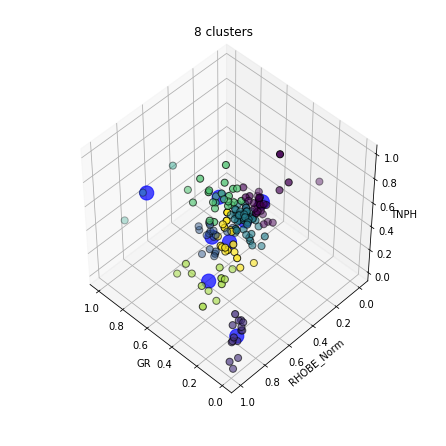

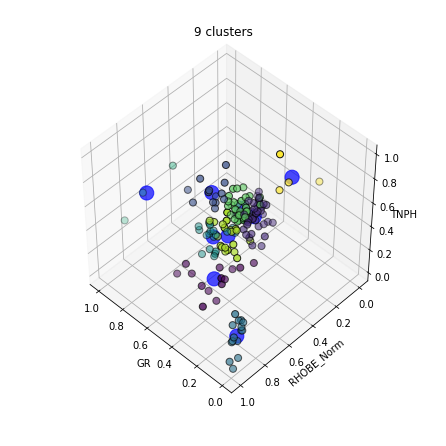

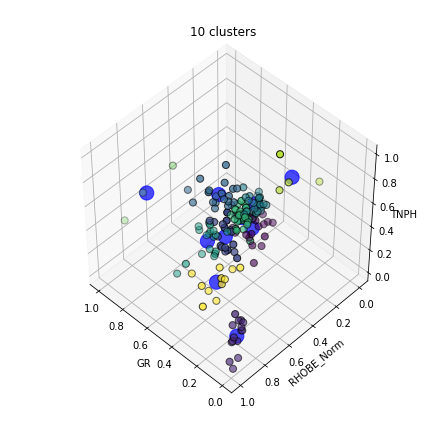

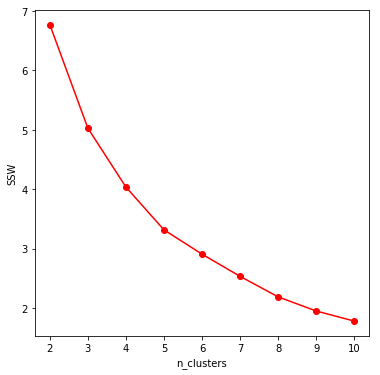

In [49]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
SSW = []
fignum = 1
n_clusters=[2,3,4,5,6,7,8,9,10]
for i in n_clusters:
   kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300)
   kmeans.fit(extractedData)
   classlabel = kmeans.predict(extractedData)
   centers = kmeans.cluster_centers_
# Store the SSW 
   SSW.append(kmeans.inertia_)
# 3D plot
   fig = plt.figure(fignum, figsize=(6, 6))
   ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134) #3D plot 
   ax.scatter(extractedData[:, 0], extractedData[:, 1], extractedData[:, 2], c=classlabel, s = 50, edgecolor='k')
   ax.scatter(centers[:, 0], centers[:, 1],centers[:, 2], c='blue', s=200, alpha=0.7)
#    ax.w_xaxis.set_ticklabels([])
#    ax.w_yaxis.set_ticklabels([])
#    ax.w_zaxis.set_ticklabels([])
   ax.set_xlabel('GR')
   ax.set_ylabel('RHOBE_Norm')
   ax.set_zlabel('TNPH')
   ax.set_title('%i clusters'%i)
   ax.dist = 12
   fignum = fignum+1
# plot the relationship between SSW and n_cluster
m=len(n_clusters)
fig = plt.figure(m+1, figsize=(6, 6))
ax1=fig.add_subplot(111)
ax1.plot(n_clusters,SSW,'ro-')
ax1.set_xlabel('n_clusters')
ax1.set_ylabel('SSW')

# The outcome shows 3 facies are ok. Next step, we will use 3 clusters to classify the data, and add the target rocktype into the dataframe.

F:\anacoda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
F:\anacoda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\anacoda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
F:\anacoda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


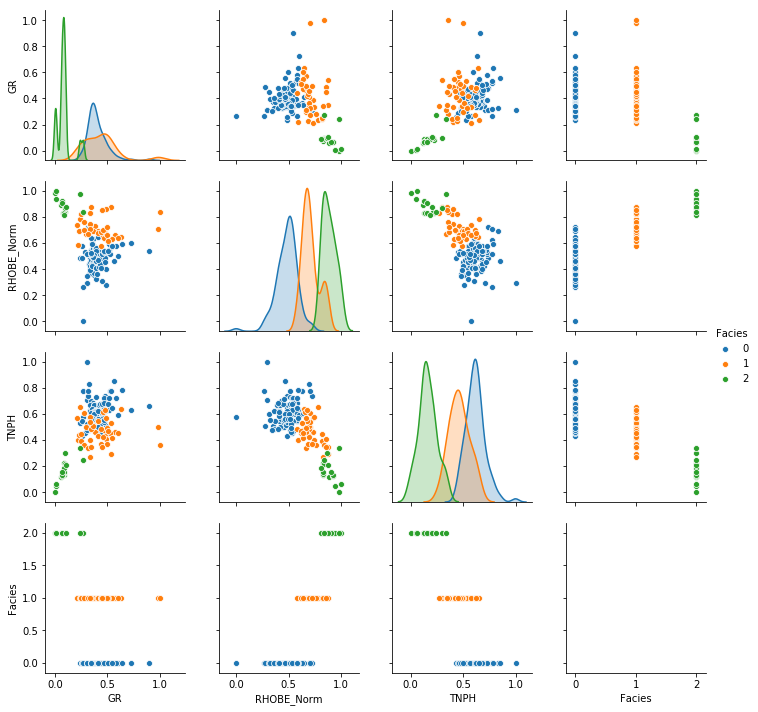

In [50]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(extractedData)
classlabel = kmeans.predict(extractedData)
# print (classlabel)
dataframe["Facies"] =classlabel  
sns.pairplot(dataframe, hue = "Facies") # Create a matrix scatterplot

# Remove the outliers. from the crossplot showed about, we just only need to remove two outliers, where the face type is 2, and the GR is above 0.

In [53]:
dataframe

,GR,RHOBE_Norm,TNPH,Facies
0,0.268730,0.000000,0.579310,0
1,0.307620,0.292978,0.706897,0
2,0.341390,0.423729,0.703448,0
3,0.236965,0.484262,0.527586,0
4,0.261776,0.576271,0.544828,0
5,0.385199,0.731235,0.465517,1
6,0.374011,0.576271,0.555172,0
7,0.333730,0.486683,0.624138,0
8,0.293280,0.670702,0.503448,1
9,0.371890,0.404358,0.617241,0


# Supervised Method-Support Vector Machines

In [66]:
# Import the SVM library
from sklearn.svm import NuSVC
from sklearn.svm import SVC
LogData=dataframe.iloc[:,0:3]
RockType=dataframe.iloc[:,3]
X = LogData
y = RockType
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) # 80% of our datset will be used for training
X_train

,GR,RHOBE_Norm,TNPH
34,0.238148,0.782082,0.655172
22,0.086537,0.813559,0.186207
0,0.268730,0.000000,0.579310
116,0.380697,0.484262,0.624138
113,0.386767,0.537530,0.631034
120,0.394697,0.464891,0.600000
91,0.374832,0.520581,0.596552
68,0.519289,0.593220,0.631034
46,0.361814,0.399516,0.651724
119,0.363287,0.484262,0.572414


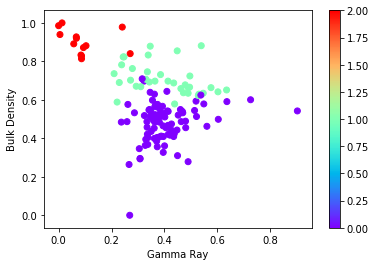

In [70]:
plt.scatter(X_train.iloc[:, 0],X_train.iloc[:, 1], c=y_train, cmap='rainbow') 
plt.xlabel('Gamma Ray')
plt.ylabel('Bulk Density')
plt.colorbar()

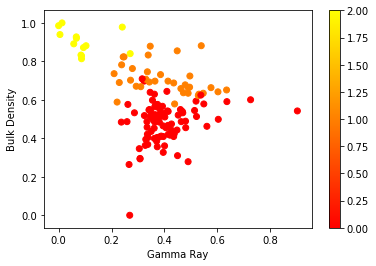

In [72]:
classifier = SVC(C = 1.0, kernel = 'rbf', gamma = 'scale', ) # Define the SVM model parameters 
classifier.fit(X_train, y_train) # Fit a classifier to the training data using y-labels corresponding to properties stored in X.
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='autumn')
plt.xlabel('Gamma Ray')
plt.ylabel('Bulk Density')
plt.colorbar()
#print(classifier.support_)
#print(classifier.support_vectors_)

In [74]:
y_pred = classifier.predict(X_test) # Predict the labels for the text X data
# If you do a train/test split, create a confusion matrix.
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[23  0  0]
 [ 0  7  0]
 [ 0  0  4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [77]:
f = open('Well Logs for SVM_CorrectedPhi.dat', 'r')
newdata = np.genfromtxt(f, skip_header=1) 
f.close()
# I am only extracting the 3 relevant log data columns for getting labels using SVM
newLogData = newdata[:, [2, 3, 4]] 

In [79]:
from sklearn.preprocessing import StandardScaler
newX = newLogData
newX = StandardScaler().fit_transform(newX)
newRockType = classifier.predict(newX) # Predict the labels for the text X data

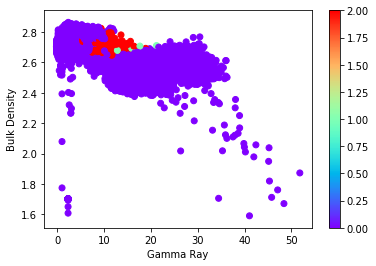

In [82]:
# Plot the GR versus Bulk Density and color the points by assigned rocktypes
plt.scatter(newLogData[:,2],newLogData[:,1], c=newRockType, cmap='rainbow')
plt.xlabel('Gamma Ray')
plt.ylabel('Bulk Density')
plt.colorbar()

Text(0.5, 0.92, '3D Plot')

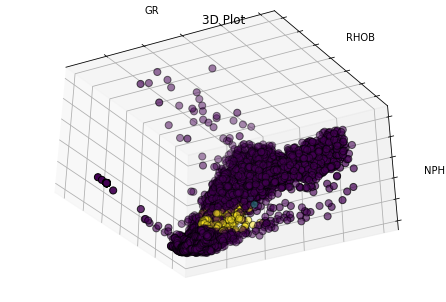

In [84]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1)
ax = Axes3D(fig, elev=-40, azim=300) #3D plot
ax.scatter(newLogData[:, 0], newLogData[:, 1], newLogData[:, 2], c=newRockType, s = 50, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('GR')
ax.set_ylabel('RHOB')
ax.set_zlabel('NPHI')
ax.set_title('3D Plot')